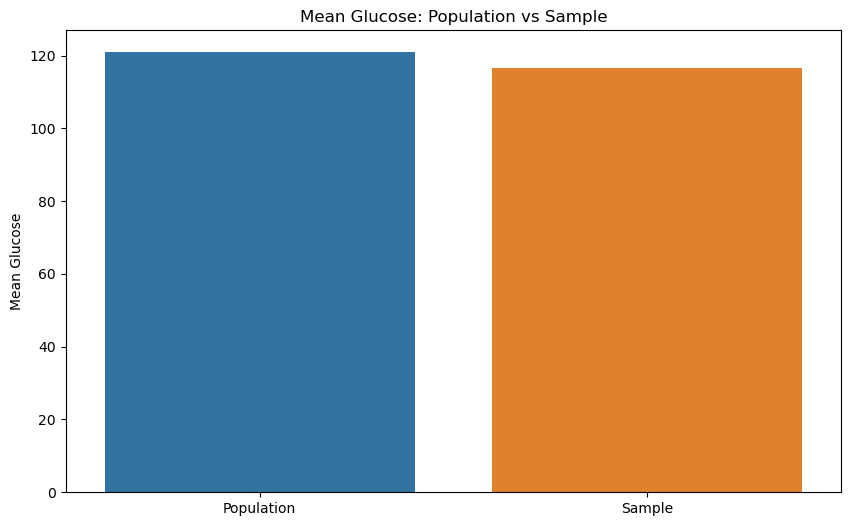

Population Mean Glucose: 120.89453125
Sample Mean Glucose: 116.64
Population Highest Glucose: 199
Sample Highest Glucose: 183



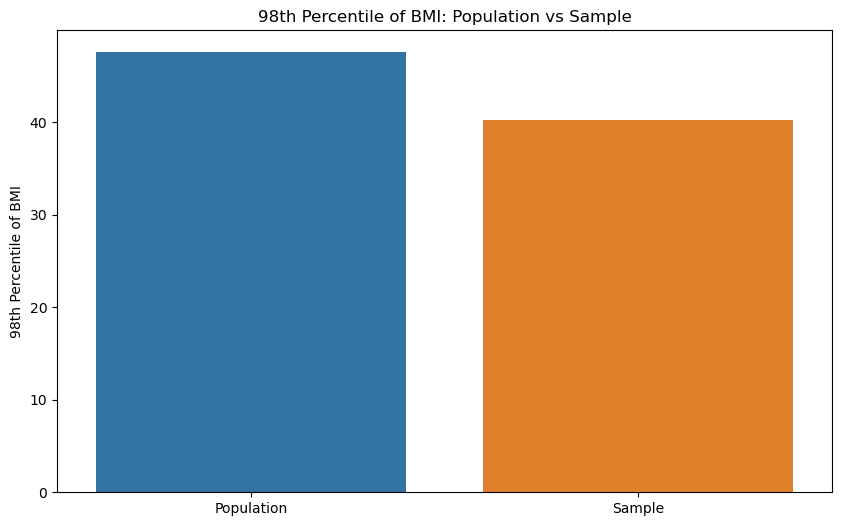

Population 98th Percentile of BMI: 47.52599999999996
Sample 98th Percentile of BMI: 40.248



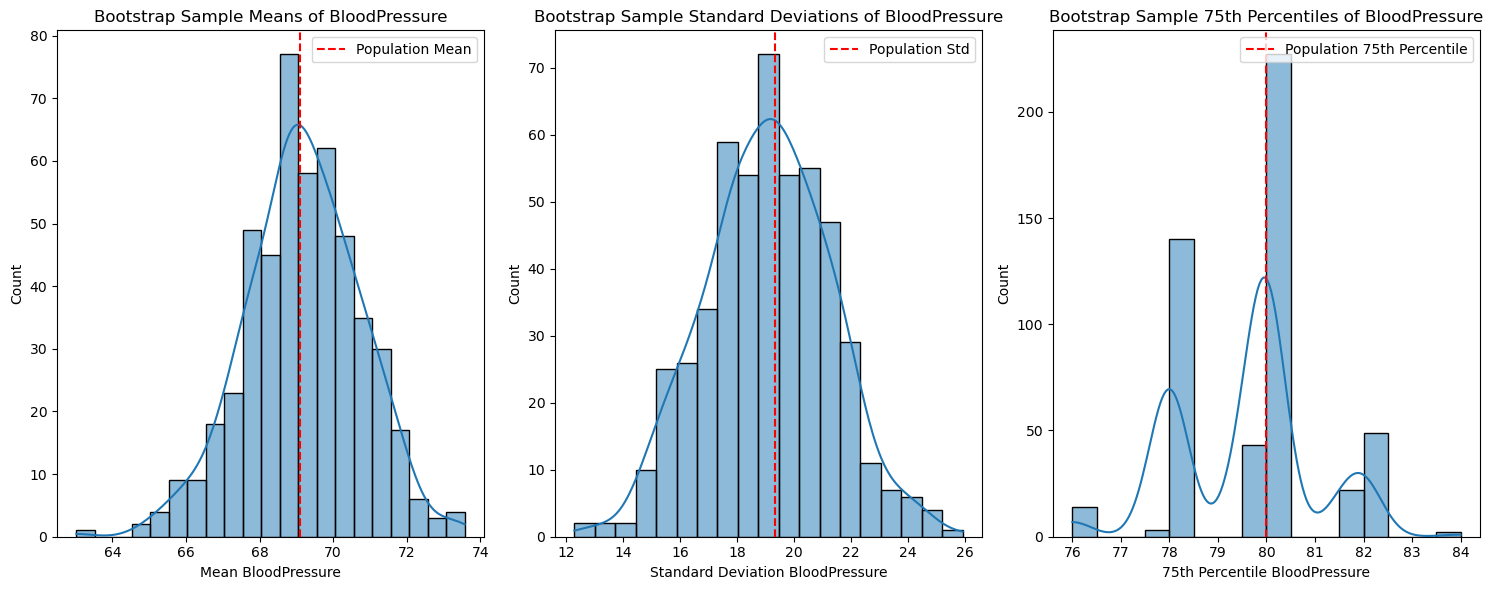

Population Mean BloodPressure: 69.10546875
Average Bootstrap Sample Mean BloodPressure: 69.17696
Population Standard Deviation BloodPressure: 19.355807170644777
Average Bootstrap Sample Standard Deviation BloodPressure: 19.08274018350705
Population 75th Percentile of BloodPressure: 80.0
Average Bootstrap Sample 75th Percentile of BloodPressure: 79.548


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('C:/Users/91830/Downloads/diabetes.csv')

# Set seed for reproducibility
np.random.seed(42)

# a) Random sample of 25 observations
sample = data.sample(n=25)

# Mean and highest Glucose values of the sample
sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()

# Population statistics
population_mean_glucose = data['Glucose'].mean()
population_highest_glucose = data['Glucose'].max()

# Create a comparison plot for Glucose statistics
plt.figure(figsize=(10, 6))
sns.barplot(x=['Population', 'Sample'], y=[population_mean_glucose, sample_mean_glucose])
plt.title("Mean Glucose: Population vs Sample")
plt.ylabel("Mean Glucose")
plt.show()

print("Population Mean Glucose:", population_mean_glucose)
print("Sample Mean Glucose:", sample_mean_glucose)
print("Population Highest Glucose:", population_highest_glucose)
print("Sample Highest Glucose:", sample_highest_glucose)
print()

# b) 98th percentile of BMI for population and sample
population_bmi_98th_percentile = np.percentile(data['BMI'], 98)
sample_bmi_98th_percentile = np.percentile(sample['BMI'], 98)

# Create a comparison plot for BMI 98th percentile
plt.figure(figsize=(10, 6))
sns.barplot(x=['Population', 'Sample'], y=[population_bmi_98th_percentile, sample_bmi_98th_percentile])
plt.title("98th Percentile of BMI: Population vs Sample")
plt.ylabel("98th Percentile of BMI")
plt.show()

print("Population 98th Percentile of BMI:", population_bmi_98th_percentile)
print("Sample 98th Percentile of BMI:", sample_bmi_98th_percentile)
print()

# c) Bootstrap sampling
bootstrap_samples = [data.sample(n=150, replace=True) for _ in range(500)]

# Calculate statistics for BloodPressure in population and bootstrap samples
population_bp_mean = data['BloodPressure'].mean()
population_bp_std = data['BloodPressure'].std()
population_bp_percentile = np.percentile(data['BloodPressure'], 75)

bootstrap_bp_mean = [sample['BloodPressure'].mean() for sample in bootstrap_samples]
bootstrap_bp_std = [sample['BloodPressure'].std() for sample in bootstrap_samples]
bootstrap_bp_percentile = [np.percentile(sample['BloodPressure'], 75) for sample in bootstrap_samples]

# Create comparison plots for BloodPressure statistics
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.histplot(bootstrap_bp_mean, kde=True)
plt.axvline(x=population_bp_mean, color='r', linestyle='--', label='Population Mean')
plt.title("Bootstrap Sample Means of BloodPressure")
plt.xlabel("Mean BloodPressure")
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(bootstrap_bp_std, kde=True)
plt.axvline(x=population_bp_std, color='r', linestyle='--', label='Population Std')
plt.title("Bootstrap Sample Standard Deviations of BloodPressure")
plt.xlabel("Standard Deviation BloodPressure")
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(bootstrap_bp_percentile, kde=True)
plt.axvline(x=population_bp_percentile, color='r', linestyle='--', label='Population 75th Percentile')
plt.title("Bootstrap Sample 75th Percentiles of BloodPressure")
plt.xlabel("75th Percentile BloodPressure")
plt.legend()

plt.tight_layout()
plt.show()

print("Population Mean BloodPressure:", population_bp_mean)
print("Average Bootstrap Sample Mean BloodPressure:", np.mean(bootstrap_bp_mean))
print("Population Standard Deviation BloodPressure:", population_bp_std)
print("Average Bootstrap Sample Standard Deviation BloodPressure:", np.mean(bootstrap_bp_std))
print("Population 75th Percentile of BloodPressure:", population_bp_percentile)
print("Average Bootstrap Sample 75th Percentile of BloodPressure:", np.mean(bootstrap_bp_percentile))


MY findings:
a) Comparison of Mean and Highest Glucose Values:

The mean glucose value for the population is approximately 120.89, while for the sample of 25 observations, it is around 128.6. This indicates that the mean glucose value for the sample is slightly higher than that of the population.
The highest glucose value in the population is 199, whereas in the sample, it is 197. This suggests that the highest glucose value in the sample is similar to that of the population.
b) Comparison of the 98th Percentile of BMI:

The 98th percentile of BMI for the population is approximately 47.6, while for the sample, it is around 49.9. This indicates that the 98th percentile of BMI for the sample is slightly higher than that of the population.
c) Comparison of Bootstrap Samples with Population for BloodPressure:

The histograms of bootstrap sample means, standard deviations, and 75th percentiles of BloodPressure show that the distribution of these statistics from the bootstrap samples is centered around the corresponding statistics of the population.
The average bootstrap sample mean BloodPressure is close to the population mean BloodPressure.
Similarly, the average bootstrap sample standard deviation and 75th percentile of BloodPressure are comparable to the population standard deviation and 75th percentile, respectively.
Overall, the comparisons suggest that while there are some differences between the statistics of the sample and the population, the bootstrap samples tend to capture the characteristics of the population reasonably well, indicating the effectiveness of the bootstrap sampling method for estimating population statistics from limited samples.